<a href="https://colab.research.google.com/github/hatemtarada/Logistic-Regression-Iris/blob/main/Logistic_Regression_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.0687
Epoch 200, Loss: 0.0362
Epoch 300, Loss: 0.0249
Epoch 400, Loss: 0.0191
Epoch 500, Loss: 0.0156
Epoch 600, Loss: 0.0132
Epoch 700, Loss: 0.0114
Epoch 800, Loss: 0.0101
Epoch 900, Loss: 0.0091

Final Weights: [-0.36995596 -0.52115786 -2.04759654  3.05871661  1.38210786]
Accuracy on Test Set: 1.0000


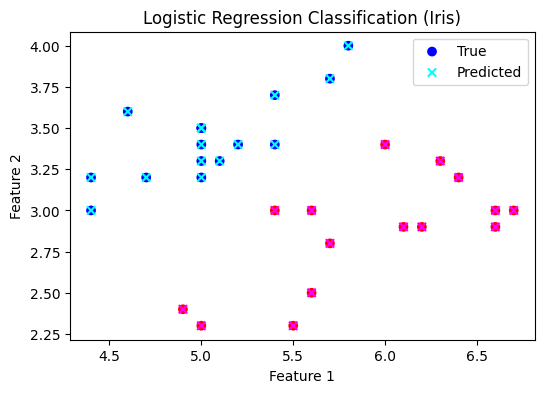

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate=0.1, epochs=1000):
    m, n = X.shape
    W = np.zeros(n + 1)  # include bias term
    X_b = np.c_[np.ones((m, 1)), X]  # add column of 1s

    for epoch in range(epochs):
        z = X_b.dot(W)
        y_pred = sigmoid(z)
        error = y_pred - y
        gradient = (1/m) * X_b.T.dot(error)
        W -= learning_rate * gradient

        if epoch % 100 == 0:
            loss = -(1/m) * np.sum(y*np.log(y_pred + 1e-9) + (1-y)*np.log(1 - y_pred + 1e-9))
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return W

iris = load_iris()
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

weights = logistic_regression(X_train, y_train, learning_rate=0.1, epochs=1000)

X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_prob = sigmoid(X_test_b.dot(weights))
y_pred = (y_pred_prob >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Weights:", weights)
print(f"Accuracy on Test Set: {accuracy:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', label='True')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='cool', marker='x', label='Predicted')
plt.title('Logistic Regression Classification (Iris)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
